# Preprocessing multi label

On effectue ici le même preprocessing que précedement hormis pour les drogues à prédire. Pour réaliser une classification multi label, nous avons en effet décidé de nous occuper uniquement des 15 drogues illégales. Nous avons donc retirer les drogues suivantes : chocolat, cafféine et alcohol ainsi que semeron puisque ce n'est pas une vraie drogue.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    f1_score,
    multilabel_confusion_matrix,
    precision_recall_fscore_support,
    ConfusionMatrixDisplay,
)

In [24]:
header = [
    "id",
    "age",
    "gender",
    "education",
    "country",
    "ethnicity",
    "neuroticism",
    "extraversion",
    "openness",
    "agreeableness",
    "conscientiousness",
    "impulsiveness",
    "sensation_seeking",
    "alcohol",
    "amphet",
    "amyl",
    "benzos",
    "caff",
    "cannabis",
    "choc",
    "coke",
    "crack",
    "ecstasy",
    "heroin",
    "ketamine",
    "legallh",
    "lsd",
    "meth",
    "mushroom",
    "nicotine",
    "semer",
    "vsa",
]

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data",
    names=header,
)
df

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [25]:
semer_consummer_index = df.loc[df["semer"] != "CL0"].index

print("Nombre de personnes ayant indiqué avoir consommé la drogue fictive : ", semer_consummer_index.size)

df.drop(index = semer_consummer_index, inplace = True)

Nombre de personnes ayant indiqué avoir consommé la drogue fictive :  8


In [26]:
df.drop(["id", "ethnicity"], axis=1, inplace=True)
df

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [27]:
df.index = range(df.shape[0])
df

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1873,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1874,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1875,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [28]:
age = {
    -0.95197: "18-24",
    -0.07854: "25-34",
    0.49788: "35-44",
    1.09449: "45-54",
    1.82213: "55-64",
    2.59171: "65+",
}
gender = {-0.48246: "male", 0.48246: "female"}
education = {
    -2.43591: "left school before 16",
    -1.7379: "left school at 16",
    -1.43719: "left school at 17",
    -1.22751: "left school at 18",
    -0.61113: "left college without degree",
    -0.05921: "professionnal certificate",
    0.45468: "university degree",
    1.16365: "master degree",
    1.98437: "doctorate degree",
}
country = {
    -0.57009: "USA",
    -0.46841: "New Zealand",
    -0.28519: "Other",
    -0.09765: "Australia",
    0.21128: "Republic of Ireland",
    0.24923: "Canada",
    0.96082 : "UK",
}

In [29]:
def map_values(df):
  df["age"] = df["age"].map(age)
  df["gender"] = df["gender"].map(gender)
  df["education"] = df["education"].map(education)
  df["country"] = df["country"].map(country)
  return df
df = map_values(df.copy())
df

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1873,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1874,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1875,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [30]:
def CL_to_binary_class(cl):
    if(cl=="CL0" or cl=="CL1" or cl=="CL2"):
        return -1
    else:
        return 1
    

drugs_illegal = ["amphet", "amyl", "benzos", "cannabis", "coke", "crack", "ecstasy", \
          "heroin", "ketamine", "legallh", "lsd", "meth", "mushroom", "nicotine", "vsa"]

df_drugs = df[drugs_illegal]
for drug in drugs_illegal:
    df_drugs[drug] = df_drugs.loc[:,drug].apply(CL_to_binary_class)
df_drugs

/tmp/ipykernel_4759/3050877994.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs[drug] = df_drugs.loc[:,drug].apply(CL_to_binary_class)


,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,vsa
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1
2,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1
1873,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,1,1,1,-1
1874,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,-1,1,-1
1875,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,1,1,-1


In [31]:
df_features = df.drop(drugs_illegal, axis=1)
df_features.drop(["alcohol", "caff", "choc", "semer"], axis=1, inplace=True)
df_features

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...
1872,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1873,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1874,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1875,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [32]:
# merge Other with Canada Australia and New Zealand, and Republic of Ireland
df_features["country"] = df_features["country"].replace(["Other", "Canada", "Australia", "New Zealand", "Republic of Ireland"], "Other")
print(df_features["country"].value_counts())

df_features["education"] = df_features["education"].replace(["left school at 18", "left school at 16", "left school at 17", "left school before 16"], "left school before 18 (included)")
print(df_features["education"].value_counts())

df_features["age"] = df_features["age"].replace(["45-54", "55-64", "65+"], "45+")
print(df_features["age"].value_counts())

UK       1044
USA       551
Other     282
Name: country, dtype: int64
left college without degree         503
university degree                   478
master degree                       283
professionnal certificate           270
left school before 18 (included)    254
doctorate degree                     89
Name: education, dtype: int64
18-24    637
25-34    480
45+      405
35-44    355
Name: age, dtype: int64


In [33]:
# perform one-hot encoding on categorical features
categorical_features = ['age', 'gender', 'education', 'country']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_features[categorical_features])
df_features_encoded = pd.DataFrame(enc.transform(df_features[categorical_features]).toarray(), columns=enc.get_feature_names_out())
# combine the one-hot encoded features with the numerical features
df_features = pd.concat([df_features.drop(categorical_features, axis=1), df_features_encoded ], axis=1)
df_features

,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,age_18-24,age_25-34,age_35-44,...,gender_male,education_doctorate degree,education_left college without degree,education_left school before 18 (included),education_master degree,education_professionnal certificate,education_university degree,country_Other,country_UK,country_USA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1873,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1874,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1875,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X = df_features
y = df_drugs

In [35]:
features = X.columns
standardScaler = StandardScaler()
standardScaler.fit(X)
X = standardScaler.transform(X)
pd.DataFrame(X, columns = features)

,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,age_18-24,age_25-34,age_35-44,...,gender_male,education_doctorate degree,education_left college without degree,education_left school before 18 (included),education_master degree,education_professionnal certificate,education_university degree,country_Other,country_UK,country_USA
0,0.313994,-0.575137,-0.582752,-0.919622,-0.006272,-0.233164,-1.220015,-0.716735,-0.586168,2.070585,...,-1.001600,-0.223106,-0.605049,-0.395601,-0.421356,2.439642,-0.584528,-0.420479,0.893248,-0.644620
1,-0.678937,1.946355,1.445164,0.764351,-0.142748,-0.751188,-0.216613,-0.716735,1.705994,-0.482955,...,0.998403,4.482174,-0.605049,-0.395601,-0.421356,-0.409896,-0.584528,-0.420479,0.893248,-0.644620
2,-0.467551,0.809487,-0.847975,-1.626059,-1.016758,-1.452073,0.425119,-0.716735,-0.586168,2.070585,...,0.998403,-0.223106,-0.605049,-0.395601,-0.421356,2.439642,-0.584528,-0.420479,0.893248,-0.644620
3,-0.148540,-0.806496,-0.016130,0.593199,0.586815,-1.452073,-1.220015,1.395215,-0.586168,-0.482955,...,-1.001600,-0.223106,-0.605049,-0.395601,2.373291,-0.409896,-0.584528,-0.420479,0.893248,-0.644620
4,0.737346,-1.636109,-0.450577,-0.302143,1.309931,-0.233164,-0.216613,-0.716735,-0.586168,2.070585,...,-1.001600,4.482174,-0.605049,-0.395601,-0.421356,-0.409896,-0.584528,-0.420479,0.893248,-0.644620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1.195930,1.747839,1.897011,0.764351,-1.140461,0.918170,2.005720,1.395215,-0.586168,-0.482955,...,-1.001600,-0.223106,1.652758,-0.395601,-0.421356,-0.409896,-0.584528,-0.420479,-1.119509,1.551301
1873,-0.246388,1.747839,0.589229,0.764351,-1.521976,0.918170,0.803486,1.395215,-0.586168,-0.482955,...,0.998403,-0.223106,1.652758,-0.395601,-0.421356,-0.409896,-0.584528,-0.420479,-1.119509,1.551301
1874,1.135432,-1.378365,-1.278153,-1.777701,-1.388248,0.549806,-0.539107,-0.716735,1.705994,-0.482955,...,-1.001600,-0.223106,-0.605049,-0.395601,-0.421356,-0.409896,1.710783,-0.420479,-1.119509,1.551301
1875,0.913147,-1.925262,0.297967,-1.626059,-2.579425,1.349119,1.281019,1.395215,-0.586168,-0.482955,...,-1.001600,-0.223106,1.652758,-0.395601,-0.421356,-0.409896,-0.584528,-0.420479,-1.119509,1.551301


In [36]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

In [37]:
y_valid

,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,vsa
157,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
55,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
990,-1,-1,1,1,-1,-1,1,-1,1,1,1,-1,1,1,-1
869,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
907,1,-1,1,1,1,-1,1,1,-1,-1,-1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
612,1,-1,1,1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1
644,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
77,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1


In [38]:
drugs_illegal

['amphet',
 'amyl',
 'benzos',
 'cannabis',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legallh',
 'lsd',
 'meth',
 'mushroom',
 'nicotine',
 'vsa']

In [39]:
# n'a finalement pas servie mais aurais pu permettre de donner plus d'importance à certaines drogues

dict_weights = [{-1:1, 1:1} for i in range(len(drugs_illegal))]
#dict_weights[drugs_illegal.index("meth")] = {-1:1, 1:1}
dict_weights

[{-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1}]

# Classification multi label

Nous avons d'abord fait la classification avec un arbre de décision car cet algorithme peut traiter une target multilabel. En effet, les noeuds vont chercher à trouver la meilleur séparation en regardant tous les labels. La conséquence que l'ont va observer est que les labels déséquilibrés vont être mal prédits.

De plus, nous pourrons comparer nos résultats avec la classification bianaire fait précédemment. Pour afficher nos résultats, nous avons choisi de faire une matrice de confusion par drogue ainsi que de calculer les roc auc score et balanced accuracy score moyens. 

balanced accuracy mean : 0.608581
roc auc mean : 0.608581


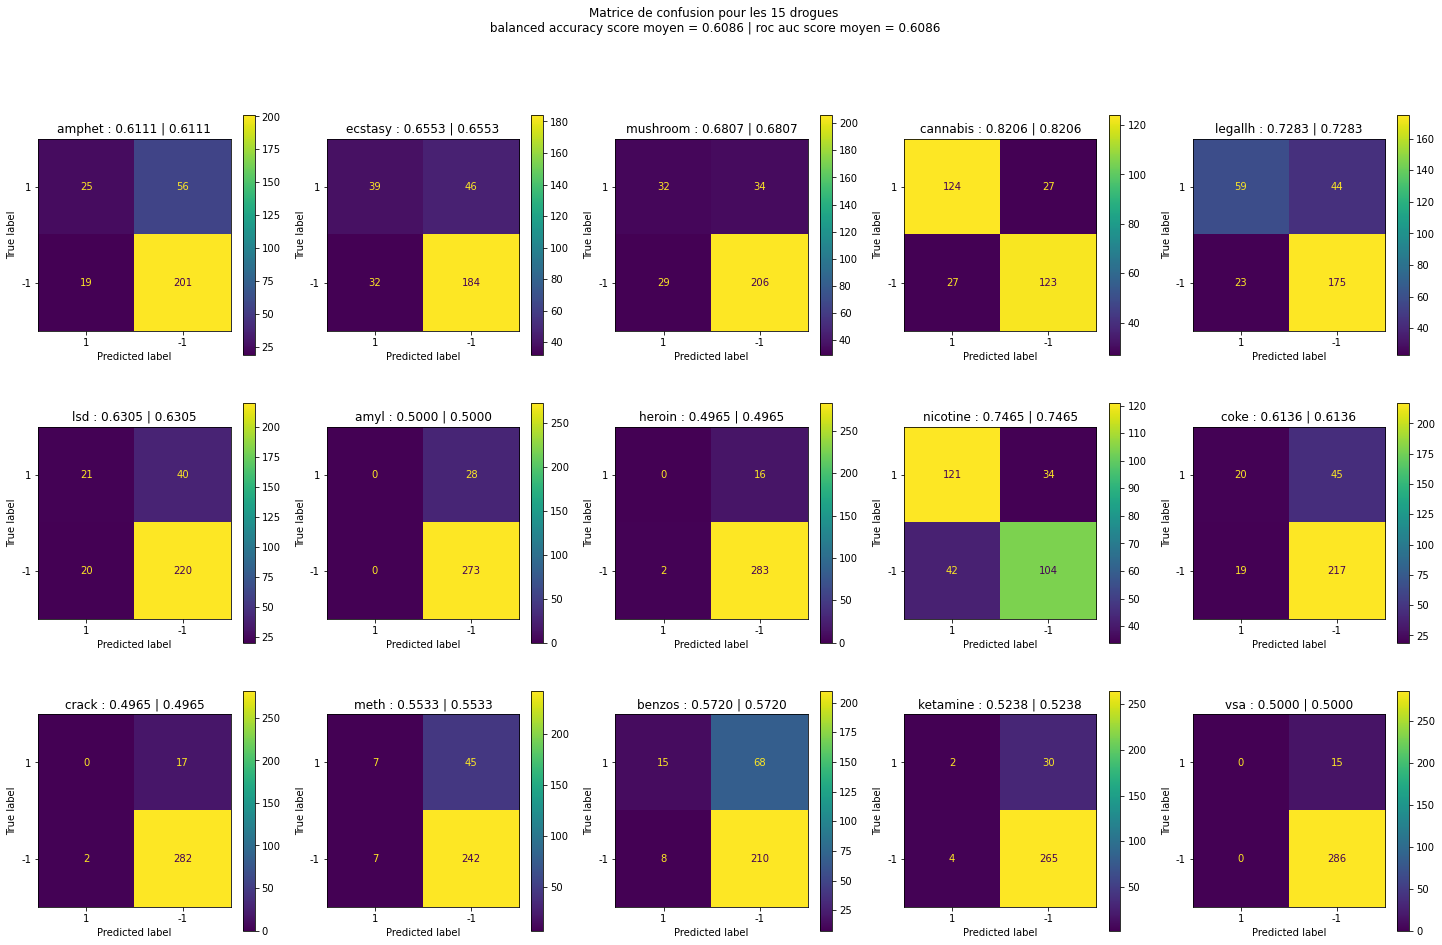

In [40]:
clf = DecisionTreeClassifier(max_leaf_nodes=50, class_weight=dict_weights, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

valid = np.array(y_valid)

fig, axs = plt.subplots(3, 5, figsize=(25, 15))

balanced_acc = np.zeros(15)
roc_auc = np.zeros(15)
for i in range(len(drugs_illegal)):
    balanced_acc[i] = balanced_accuracy_score(valid.T[i], y_pred.T[i])
    roc_auc[i] = roc_auc_score(valid.T[i], y_pred.T[i])
    ConfusionMatrixDisplay.from_predictions(valid.T[i], y_pred.T[i], ax=axs[i%3][i%5], labels=[1, -1])
    axs[i%3][i%5].set_title("%s : %.4f | %.4f" % (drugs_illegal[i], balanced_acc[i], roc_auc[i]))

print("balanced accuracy mean : %f" % balanced_acc.mean())
print("roc auc mean : %f" % roc_auc.mean())

fig.suptitle("Matrice de confusion pour les 15 drogues\n balanced accuracy score moyen = %.4f | roc auc score moyen = %.4f" % (balanced_acc.mean(), roc_auc.mean()))

#fig, ax = plt.subplots(figsize=(30, 40))
#tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=features)
pass

Nous avons obtenue une balanced accuracy de 0.62. Il n'y avait que quelques drogues qui étaient pas trop mal classé. Certaines drogues pour lesquelles il y a très peu de consommateurs n'étaient pas vraiment classé, tous les échantillons étaient considéré comme non-consommateur.  

## Random Forest

Nous avons ensuite fait la classification avec une random forest puisque cela semblait être un des meilleurs modèles selon nos analyses précédentes et qu'elle utilise encore des arbres de décisions. Nous nous sommes aussi dit que le hasard qu'apportait la random forest permettrait peut-être de moins être affecté par le problème d'équilibrage entre les consommateurs et les non-consommateurs de certaines drogues.  

balanced accuracy mean : 0.628682
roc auc mean : 0.628682


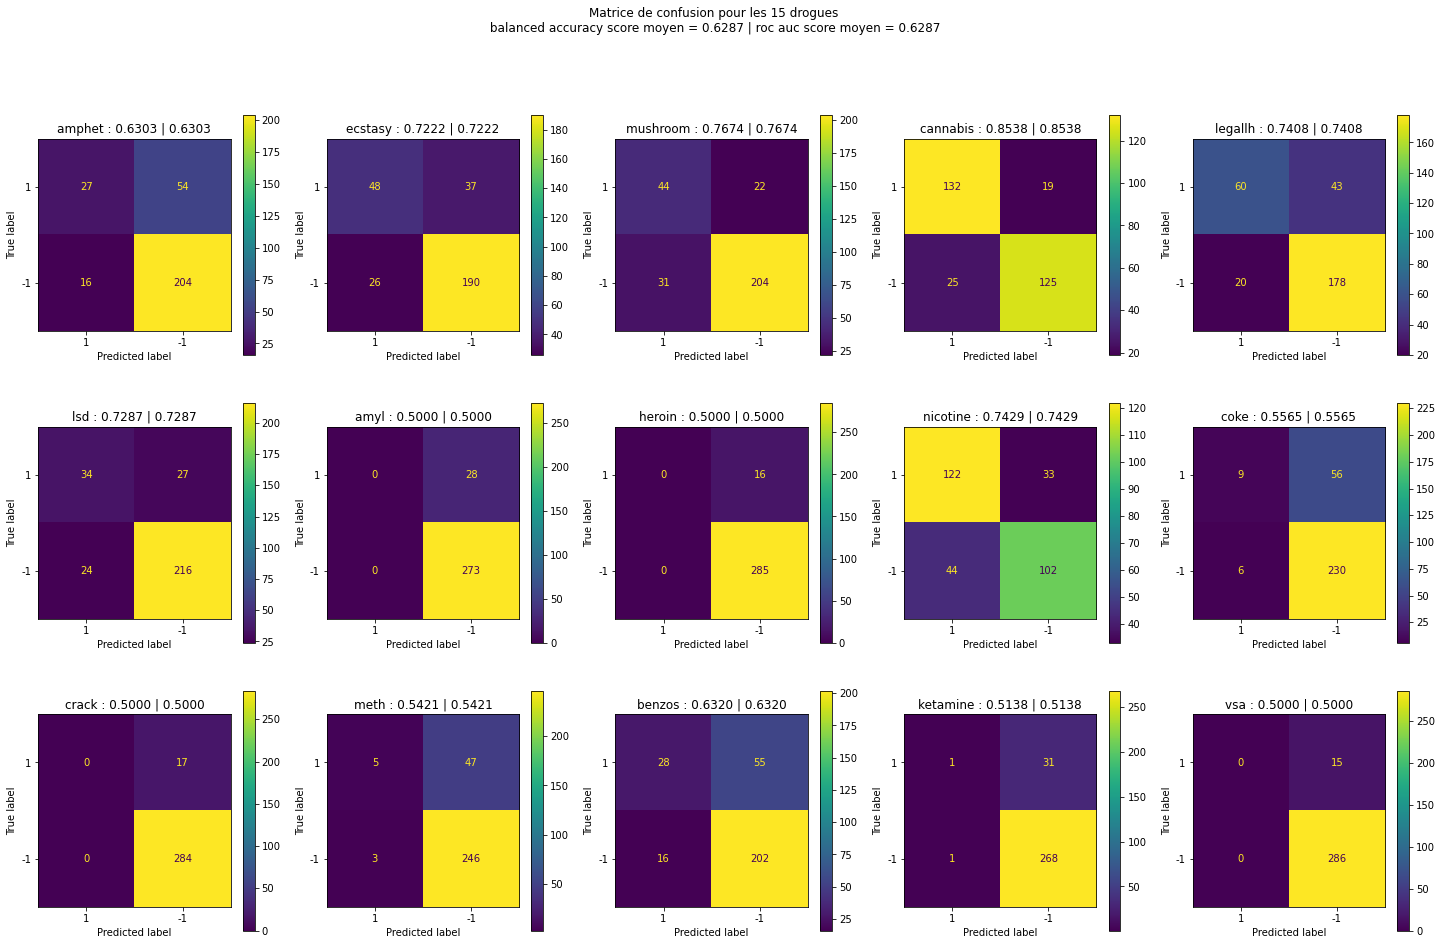

In [41]:
prof_max = 50

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=prof_max, 
                             class_weight=dict_weights,
                              min_samples_leaf=5, 
                              max_leaf_nodes=50, 
                              n_jobs=-1,
                              max_features=0.9,
                              random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

valid = np.array(y_valid)

fig, axs = plt.subplots(3, 5, figsize=(25, 15))

balanced_acc = np.zeros(15)
roc_auc = np.zeros(15)
for i in range(len(drugs_illegal)):
    balanced_acc[i] = balanced_accuracy_score(valid.T[i], y_pred.T[i])
    roc_auc[i] = roc_auc_score(valid.T[i], y_pred.T[i])
    ConfusionMatrixDisplay.from_predictions(valid.T[i], y_pred.T[i], ax=axs[i%3][i%5], labels=[1, -1])
    axs[i%3][i%5].set_title("%s : %.4f | %.4f" % (drugs_illegal[i], balanced_acc[i], roc_auc[i]))

print("balanced accuracy mean : %f" % balanced_acc.mean())
print("roc auc mean : %f" % roc_auc.mean())


fig.suptitle("Matrice de confusion pour les 15 drogues\n balanced accuracy score moyen = %.4f | roc auc score moyen = %.4f" % (balanced_acc.mean(), roc_auc.mean()))

#fig, ax = plt.subplots(figsize=(30, 40))
#tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=features)
pass

Avec la random forest nous restons à un balanced accuracy score d'environ 0.63. Nous avons donc réalisé des tests d'hyper-paramètres pour essayer d'améliorer nos résultats mais les différents tests ne permettaient pas d'améliorer le score de manière remarquable, juste de connaître l'overfitting.  

### Test d'hyper-paramètres

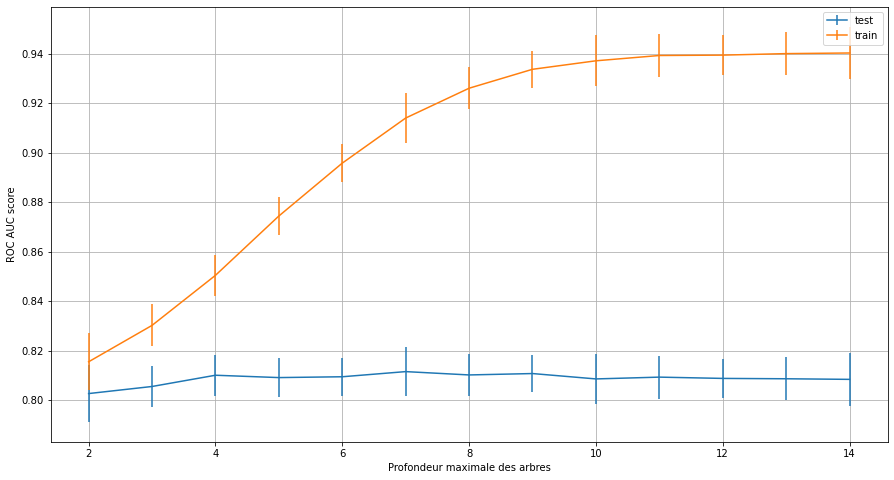

In [42]:
roc_auc_test_mean = np.zeros(13)
roc_auc_train_mean = np.zeros(13)
roc_auc_test_std = np.zeros(13)
roc_auc_train_std = np.zeros(13)
valid = np.array(y_valid)
train_true = np.array(y_train)

scoring = ["roc_auc"]

for prof_max in range(2, 15):
    clf = RandomForestClassifier(n_estimators=100,
                                max_depth=prof_max, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                #max_leaf_nodes=50, 
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[prof_max-2] = result["test_roc_auc"].mean()
    roc_auc_train_mean[prof_max-2] = result["train_roc_auc"].mean()
    roc_auc_test_std[prof_max-2] = result["test_roc_auc"].std()
    roc_auc_train_std[prof_max-2] = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(range(2, 15)), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(range(2, 15)), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Profondeur maximale des arbres")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


36


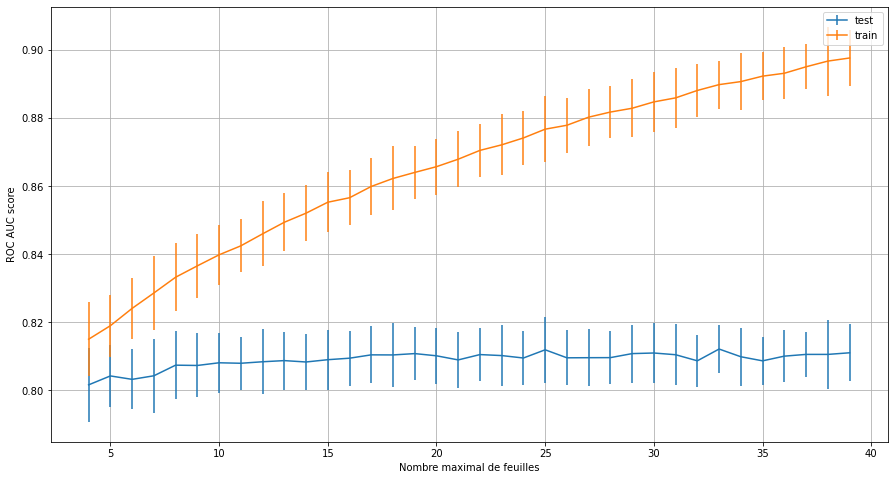

In [43]:
n = len(range(4, 40))
print(n)

roc_auc_test_mean = np.zeros(n)
roc_auc_train_mean = np.zeros(n)
roc_auc_test_std = np.zeros(n)
roc_auc_train_std = np.zeros(n)

scoring = ["roc_auc"]

for nb_feuille in range(4, 40):
    clf = RandomForestClassifier(n_estimators=100,
                                #max_depth=prof_max, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                max_leaf_nodes=nb_feuille, 
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[nb_feuille-4] = result["test_roc_auc"].mean()
    roc_auc_train_mean[nb_feuille-4]  = result["train_roc_auc"].mean()
    roc_auc_test_std[nb_feuille-4]  = result["test_roc_auc"].std()
    roc_auc_train_std[nb_feuille-4]  = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(range(4, 40)), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(range(4, 40)), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Nombre maximal de feuilles")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


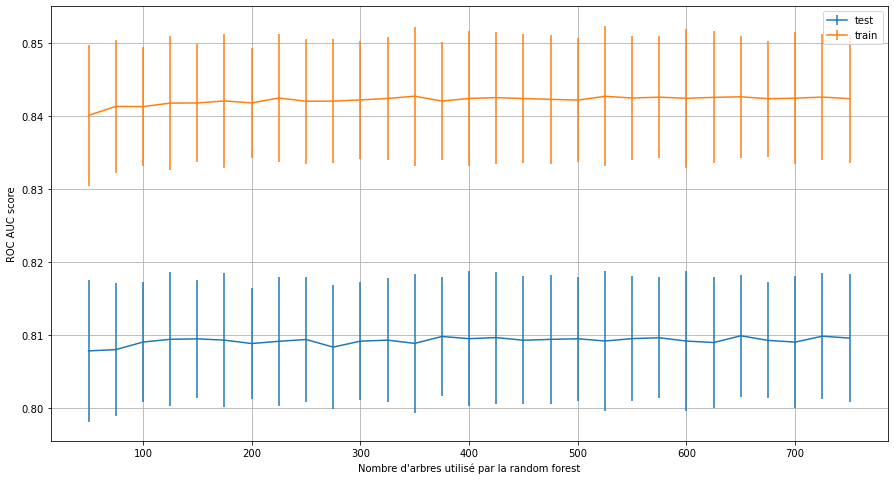

In [44]:
intervalle = range(50, 751, 25)
n = len(intervalle)

roc_auc_test_mean = np.zeros(n)
roc_auc_train_mean = np.zeros(n)
roc_auc_test_std = np.zeros(n)
roc_auc_train_std = np.zeros(n)

scoring = ["roc_auc"]

for nb_tree in intervalle:
    clf = RandomForestClassifier(n_estimators=nb_tree,
                                max_depth=4, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                max_leaf_nodes=11, 
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[int(nb_tree/25) - 2] = result["test_roc_auc"].mean()
    roc_auc_train_mean[int(nb_tree/25) - 2]  = result["train_roc_auc"].mean()
    roc_auc_test_std[int(nb_tree/25) - 2]  = result["test_roc_auc"].std()
    roc_auc_train_std[int(nb_tree/25) - 2]  = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(intervalle), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(intervalle), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Nombre d'arbres utilisé par la random forest")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


/home/camille/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/camille/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camille/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/camille/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/home/camille/anaconda3/lib/python

TypeError: '<=' not supported between instances of 'int' and 'str'

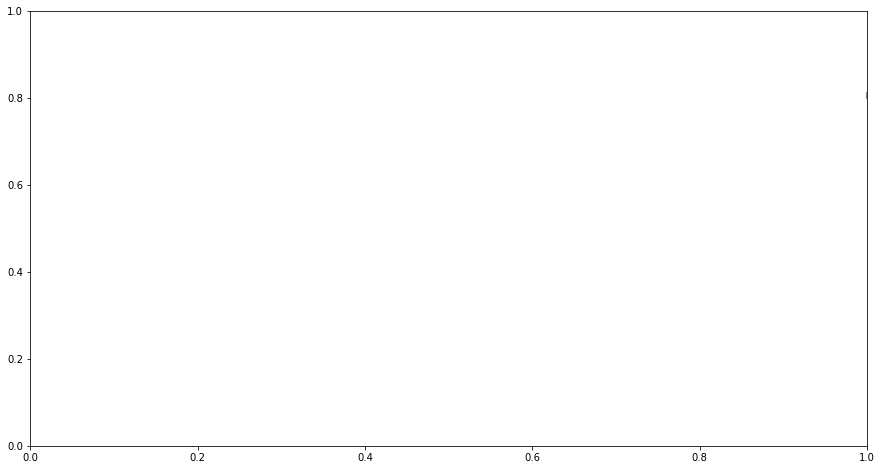

In [45]:
roc_auc_test_mean = np.zeros(31)
roc_auc_train_mean = np.zeros(31)
roc_auc_test_std = np.zeros(31)
roc_auc_train_std = np.zeros(31)
valid = np.array(y_valid)
train_true = np.array(y_train)

scoring = ["roc_auc"]

for n_features in range(1, 32):
    clf = RandomForestClassifier(n_estimators=100,
                                max_depth=4, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                max_leaf_nodes=11, 
                                max_features=n_features,
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[n_features-1] = result["test_roc_auc"].mean()
    roc_auc_train_mean[n_features-1] = result["train_roc_auc"].mean()
    roc_auc_test_std[n_features-1] = result["test_roc_auc"].std()
    roc_auc_train_std[n_features-1] = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(range(1, 32)), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(range(1, 32)), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Nombres de features considéré pour trouver le meilleur branchement")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


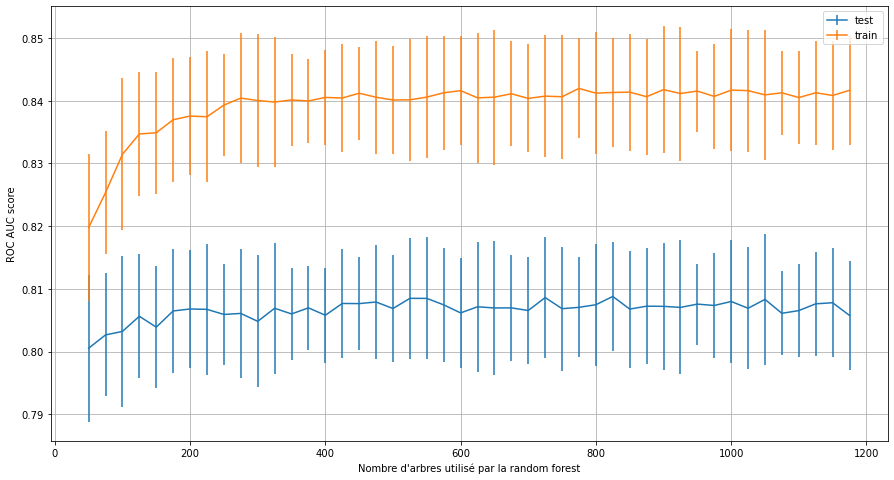

In [ ]:
intervalle = range(50, X_train.shape[0], 25)
n = len(intervalle)

roc_auc_test_mean = np.zeros(n)
roc_auc_train_mean = np.zeros(n)
roc_auc_test_std = np.zeros(n)
roc_auc_train_std = np.zeros(n)

scoring = ["roc_auc"]

for n_samples in intervalle:
    clf = RandomForestClassifier(n_estimators=100,
                                max_samples=n_samples,
                                max_depth=4, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                max_leaf_nodes=11, 
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[int(n_samples/25) - 2] = result["test_roc_auc"].mean()
    roc_auc_train_mean[int(n_samples/25) - 2]  = result["train_roc_auc"].mean()
    roc_auc_test_std[int(n_samples/25) - 2]  = result["test_roc_auc"].std()
    roc_auc_train_std[int(n_samples/25) - 2]  = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(intervalle), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(intervalle), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Nombre d'échantillons utilisé par chaque arbre")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


Quelque soit les hyper paramètres testés, on observe un overfitting significatif.

### X_test

balanced accuracy mean : 0.572207
roc auc mean : 0.572207


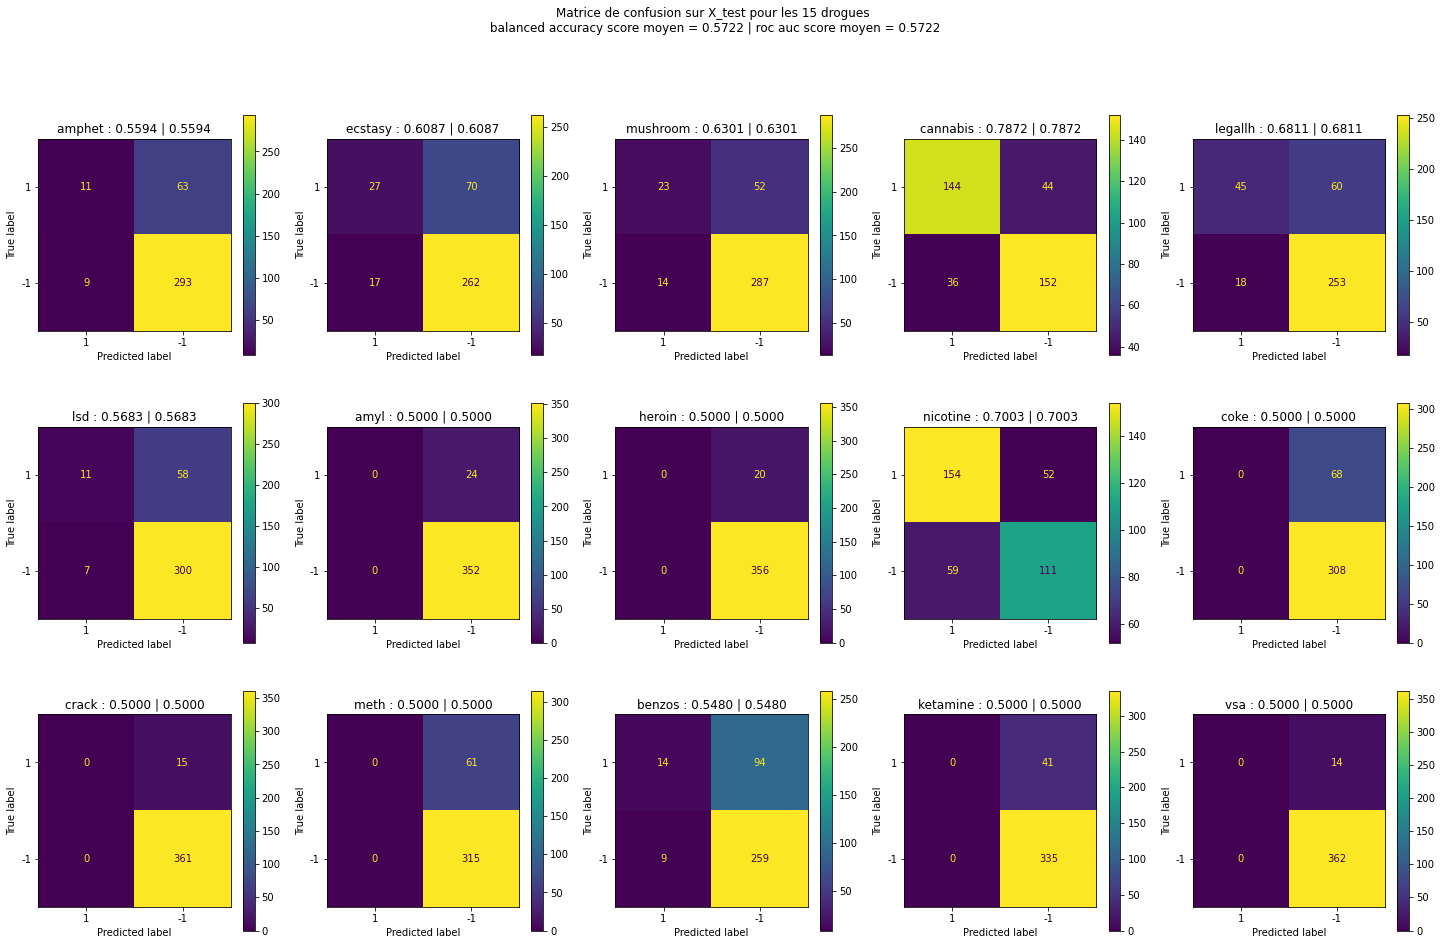

In [ ]:

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=4, 
                             class_weight=dict_weights,
                              min_samples_leaf=5, 
                              max_leaf_nodes=11, 
                              max_features=8,
                              max_samples=175,
                              n_jobs=-1, random_state=0)
clf.fit(X_train_valid, y_train_valid)
y_pred = clf.predict(X_test)

valid = np.array(y_test)

fig, axs = plt.subplots(3, 5, figsize=(25, 15))

balanced_acc = np.zeros(15)
roc_auc = np.zeros(15)
for i in range(len(drugs_illegal)):
    balanced_acc[i] = balanced_accuracy_score(valid.T[i], y_pred.T[i])
    roc_auc[i] = roc_auc_score(valid.T[i], y_pred.T[i])
    ConfusionMatrixDisplay.from_predictions(valid.T[i], y_pred.T[i], ax=axs[i%3][i%5], labels=[1, -1])
    axs[i%3][i%5].set_title("%s : %.4f | %.4f" % (drugs_illegal[i], balanced_acc[i], roc_auc[i]))

print("balanced accuracy mean : %f" % balanced_acc.mean())
print("roc auc mean : %f" % roc_auc.mean())

fig.suptitle("Matrice de confusion sur X_test pour les 15 drogues\n balanced accuracy score moyen = %.4f | roc auc score moyen = %.4f" % (balanced_acc.mean(), roc_auc.mean()))

pass

# Conclusion

Nous pensons que si nous avions réalisé un modèle de classification binaire pour chacune des drogues, nous aurions probablement pu obtenir de meilleurs résultats. Cependant, cette approche aurait été beaucoup plus longue et coûteuse en termes de temps et de ressources.

En conclusion, bien que la classification multi-label pour plusieurs drogues ait présenté des défis, notamment en raison du déséquilibre entre les consommateurs et les non-consommateurs pour certaines drogues, les modèles de forêt aléatoire ont permis d'obtenir des résultats légèrement meilleurs que les arbres de décision. Il pourrait être intéressant d'explorer d'autres modèles ou approches pour améliorer davantage la performance de la classification multi-label notamment le boosting ou l'apprentissage ensembliste.

Cependant ces deux derniers aurait demandé des explications fournies car nous n'avons pas vu ces deux méthodes en cours. Cependant en général, ces deux méthodes fournissent de bien meilleurs résultats.